## Naive Bayes
Inflation VS currency exchange in "Derecha Diario"

In [1]:
import pandas as pd
import pickle

In [2]:
data = pickle.load(open('data/df_clean_der.pkl','rb'))

In [3]:
inflation = data.loc[data.topics == 'inflation']
inflation.shape

(42, 7)

In [4]:
exchange = data.loc[data.topics == 'exchange']
exchange.shape

(30, 7)

In [5]:
corpus = inflation.append(exchange)
corpus.shape

(72, 7)

In [6]:
corpus

,topics,date,flyer,title,lead,body,url
0,inflation,24/12/2020,Economía,Represión inflacionaria y riesgo para 2021: Mo...,La famosa multinacional financiera alerta sobr...,En medio de una época típicamente marcada por ...,https://derechadiario.com.ar/economia/represio...
1,inflation,16/12/2020,Economía,A pesar de las medidas de último recurso de Gu...,El INDEC difundió los resultados del índice de...,El Instituto Nacional de Estadística y Censos ...,https://derechadiario.com.ar/economia/a-pesar-...
2,inflation,15/12/2020,Economía,La AFIP no da respiro: el mínimo no imponible ...,"El Mínimo No Imponible sólo aumentará 35,38% y...","Desde 2018, según lo establecido por la Ley 27...",https://derechadiario.com.ar/economia/la-afip-...
3,inflation,14/12/2020,Economía,Fracaso de los Precios Máximos: 580 negocios f...,Pese a los rigurosos controles de la Secretarí...,El Índice de Precios al Consumidor y las expec...,https://derechadiario.com.ar/economia/fracaso-...
4,inflation,12/12/2020,Economía,Crece el empleo estatal mientras cae el sector...,"Pese al cepo laboral y las restricciones, el s...","Según el INDEC, el sector privado formal habrí...",https://derechadiario.com.ar/economia/crece-el...
...,...,...,...,...,...,...,...
67,exchange,17/04/2020,Economía,El dólar paralelo superó los $100 y ya no pare...,Alberto Fernández es el primero desde Alfonsín...,Tras el anuncio del presidente del Banco Centr...,https://derechadiario.com.ar/economia/el-dolar...
68,exchange,14/04/2020,Economía,Se dispara el dólar: alcanzó los 114 pesos y c...,El tipo de cambio CCL escaló hasta la alarmant...,La jornada de hoy se caracterizó por una fuert...,https://derechadiario.com.ar/economia/se-dispa...
69,exchange,04/04/2020,Economía,Inminente levantamiento de las restricciones s...,El gobierno se prepara para levantar el parkin...,"El gobierno, mediante la Comisión Nacional de ...",https://derechadiario.com.ar/economia/inminent...
70,exchange,12/03/2020,Economía,Argentina en crisis: se dispara el riesgo país...,"El Riesgo País sigue sin encontrar techo, sube...",Una nueva mañana comenzó este jueves 12 de mar...,https://derechadiario.com.ar/economia/argentin...


#### Train - Test Split

In [7]:
X = corpus.body

In [8]:
y = corpus.topics

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train,test,y_train,y_test = train_test_split(X, y, train_size=0.75); 

In [11]:
train.shape, test.shape

((54,), (18,))

### Tokenization + Vectorization
#### CountVectorizer

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import re

In [13]:
stopwords_sp = stopwords.words('spanish')

In [14]:
def removal(text):
    text = re.sub(r'(\d|\$|\%|\+)', '', text.lower())
    return re.sub(r'\d+', '', text)

In [15]:
vectorizer = CountVectorizer(stop_words = stopwords_sp, lowercase = True, strip_accents='unicode', preprocessor=removal)

In [16]:
vectorizer.fit(list(re.sub(r'(\d|\$|\%|\+)', '', doc) for doc in corpus.body))

CountVectorizer(preprocessor=<function removal at 0x7fcafaaeca70>,
                stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                            'del', 'se', 'las', 'por', 'un', 'para', 'con',
                            'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                            'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                            'porque', ...],
                strip_accents='unicode')

In [17]:
X_train = vectorizer.transform(train);

In [18]:
X_train

<54x5233 sparse matrix of type '<class 'numpy.int64'>'
	with 12119 stored elements in Compressed Sparse Row format>

In [19]:
X_train_matriz = X_train.todense()

In [20]:
X_test = vectorizer.transform(test);

In [21]:
X_test_matriz = X_train.todense()

#### Tf IDf Vectorizer

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer

In [23]:
X_train_matriz_tfidf = TfidfTransformer().fit_transform(X_train_matriz);

In [24]:
X_test_matriz_tfidf = TfidfTransformer().fit_transform(X_test_matriz);

### Multinomial Naive Bayes + CountVectorizer

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [26]:
multi_nb = MultinomialNB()

multi_nb.fit(X_train, y_train.values)

MultinomialNB()

In [27]:
y_pred = multi_nb.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_pred, y_test.values)

0.9444444444444444

In [30]:
confusion_matrix(y_pred, y_test.values)

array([[ 6,  0],
       [ 1, 11]])

### Multinomial Naive Bayes + TfIDf

In [31]:
multi_nb_2 = MultinomialNB()

multi_nb_2.fit(X_train_matriz_tfidf, y_train.values)

MultinomialNB()

In [32]:
y_pred = multi_nb_2.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_pred, y_test.values)

0.8333333333333334

In [35]:
confusion_matrix(y_pred, y_test.values)

array([[ 4,  0],
       [ 3, 11]])

### Tokenization + Vectorization (Manual)

#### CountVectorizer with pre-built tokens

In [36]:
cv_tokens = pickle.load(open('tokens/topic_tokens_der_new.pkl', 'rb'))

In [37]:
vectorizer.fit(cv_tokens.drop('topics', axis=1))

CountVectorizer(preprocessor=<function removal at 0x7fcafaaeca70>,
                stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                            'del', 'se', 'las', 'por', 'un', 'para', 'con',
                            'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                            'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                            'porque', ...],
                strip_accents='unicode')

In [38]:
X_train_2 = vectorizer.transform(train)

In [39]:
X_train_matriz_2 = X_train_2.todense()

In [40]:
X_test_2 = vectorizer.transform(test)

In [41]:
X_test_matriz_2 = X_test_2.todense()

#### TF-IDF Vectorizer with pre-built tokens

In [42]:
X_train_matriz_tfidf_2 = TfidfTransformer().fit_transform(X_train_matriz_2);

In [43]:
X_test_matriz_tfidf_2 = TfidfTransformer().fit_transform(X_test_matriz_2);

### Multinomial Naive Bayes + CountVectorizer (updated tokens)

In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [45]:
multi_nb = MultinomialNB()

multi_nb.fit(X_train_2, y_train.values)

MultinomialNB()

In [46]:
y_pred_2 = multi_nb.predict(X_test_2)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_pred_2, y_test.values)

0.9444444444444444

In [49]:
confusion_matrix(y_pred_2, y_test.values)

array([[ 6,  0],
       [ 1, 11]])

### Multinomial Naive Bayes + Tf IDf Vectorizer (updated tokens)

In [50]:
multi_nb_2 = MultinomialNB()

multi_nb_2.fit(X_train_matriz_tfidf_2, y_train.values)

MultinomialNB()

In [51]:
y_pred_2 = multi_nb_2.predict(X_test_matriz_tfidf_2)

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(y_pred_2, y_test.values)

0.8333333333333334

In [54]:
matrix = confusion_matrix(y_pred_2, y_test.values)
matrix

array([[ 4,  0],
       [ 3, 11]])

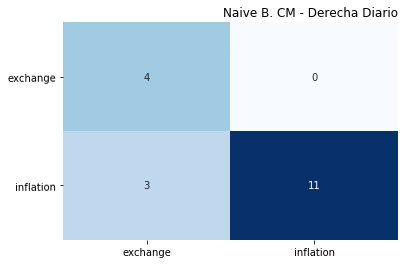

In [57]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.heatmap(matrix, annot=True, cbar=False, cmap="Blues")
plt.xticks([0.5, 1.5],['exchange','inflation'])
plt.yticks([0.5, 1.5],['exchange','inflation'], rotation = 0.5)
plt.title('Naive B. CM - Derecha Diario', loc='right')
plt.show()

In [56]:
pd.DataFrame({'pred':y_pred_2,'actual': y_test, 'match': y_pred_2 == y_test })

,pred,actual,match
3,inflation,inflation,True
57,exchange,exchange,True
27,inflation,inflation,True
41,inflation,inflation,True
10,inflation,inflation,True
16,inflation,inflation,True
60,inflation,exchange,False
58,inflation,exchange,False
38,inflation,inflation,True
61,exchange,exchange,True


##### Multinomial Naive Bayes models finds more trouble to accuretly classify "derecha diario" news by topic. These scores can be explained from the results delivered by the SVD and PCA models, which proved that several news regarding inflation make use rather of a more monetary or financial lexicon to talk about the main topic.